<a href="https://colab.research.google.com/github/PriyankaGona/MachineLearning-Assignments/blob/master/hw2_model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Required headers and libraries are imported
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

Using TensorFlow backend.


In [0]:
# Required variables are declared
batch_size = 32
num_classes = 10
epochs = 100

#Loading and shuffling Cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, y_train = shuffle(x_train, y_train, random_state=0)


split_index = int(0.8 * x_train.shape[0])


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

# Dividing data into training and validation sets
train_x = x_train[:split_index]
train_y = y_train[:split_index]

validate_x = x_train[split_index:]
validate_y = y_train[split_index:]

print("\nnumber of samples in training set: ",len(train_x))
print("number of samples in validation set: ",len(validate_x))

input_shape = train_x.shape[1:]
print("Shape of images: ",input_shape)

170500096/170498071 [==============================] - 38s 0us/step

number of samples in training set:  40000
number of samples in validation set:  10000
Shape of images:  (32, 32, 3)


In [0]:
def getModel(input_shape):
  
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(BatchNormalization())
  
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  
  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())
  
  model.add(Dropout(0.5))
  
  model.add(Dense(num_classes, activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])
  
  return model

In [0]:
def train_model(model, train_x, train_y, validate_x, validate_y):
  # Data Augmentation
	datagen = ImageDataGenerator(rotation_range=0, width_shift_range=0.1,height_shift_range=0.1,fill_mode='nearest', horizontal_flip=True, vertical_flip=False, rescale=None)

	datagen.fit(train_x)

	for e in range(10):
		batches = 0
		for x_batch, y_batch in datagen.flow(train_x, train_y, batch_size=40000):
			model.fit(x_batch, y_batch)
			batches += 1
			if batches >= 1:
				# we need to break the loop by hand because
				# the generator loops indefinitely
				break
				
				
	return model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(validate_x, validate_y))

In [0]:
# Model is tested in this model
def test_model(validate_x, validate_y):
	
	score = model.evaluate(validate_x, validate_y, verbose=0)
	
	print('')
	print('Test loss:', score[0])
	print('Test accuracy:', score[1])

In [0]:
#Plotted the accuracy against number of epochs
def plot_training_graph(training_history):
	
	plotaccuracy = plt.plot(range(1,epochs+1), training_history.history['acc'],range(1,epochs+1), training_history.history['val_acc'])

	plt.xlabel('Number of epochs')
	plt.ylabel('Accuracy')

	plt.legend(('Train Accuracy','Test Accuracy'))

	plt.show(plotaccuracy)

	print('\n\nvalidation loss:', training_history.history['val_loss'][-1])
	print('validation accuracy:', training_history.history['val_acc'][-1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
40000/40000 [==============================] - 28s 691us/step - loss: 2.3377 - acc: 0.3145
Epoch 1/1
40000/40000 [==============================] - 24s 600us/step - loss: 1.8103 - acc: 0.4098
Epoch 1/1
40000/40000 [==============================] - 24s 604us/step - loss: 1.5987 - acc: 0.4541
Epoch 1/1
40000/40000 [==============================] - 24s 599us/step - loss: 1.4579 - acc: 0.4940
Epoch 1/1
40000/40000 [==============================] - 25s 621us/step - loss: 1.3310 - acc: 0.5367
Epoch 1/1
40000/40000 [==============================] - 24s 601us/step - loss: 1.2496 - acc: 0.5612
Epoch 1/1
40000/40000 [==============================] - 24s 601us/step - loss: 1.1745 - acc: 0.5824
Epoch 1/1
40000/40000 [==============================] - 2

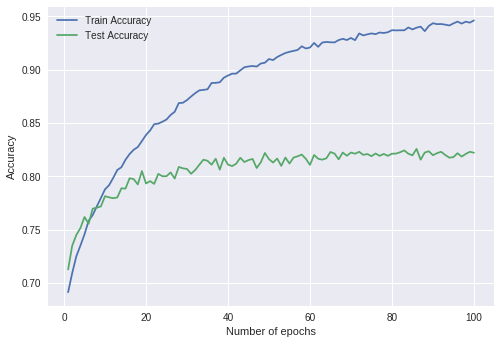



validation loss: 0.6192357271432877
validation accuracy: 0.8221


In [0]:
# Calling all the methods
model = getModel(input_shape)
History = train_model(model, train_x, train_y, validate_x, validate_y)
test_model(validate_x, validate_y)
plot_training_graph(History)